In [1]:
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn3

import os
os.chdir('/Users/soheepark/03-GEO근감소/Data/')

In [2]:
ohyh = pd.read_csv('./gse167186/ohyh/results_GSE167186_ohyh_filtered.csv', index_col=0)
osoh = pd.read_csv('./gse167186/osoh/results_GSE167186_osoh_filtered.csv', index_col=0)
osyh = pd.read_csv('./gse167186/osyh/results_GSE167186_osyh_filtered.csv', index_col=0)

osoh_ = pd.read_csv('./gse111016/osoh/results_GSE111016_osoh_filtered.csv', index_col=0)

# Goal 1
* gse111016 히트맵 결과 요상한거 치료  
* cutoff 기준: pvalue < 0.05, |Log2FC| > 1  
* 이상한놈: 아래 샘플들 패턴이 아주 유사함
    * sample2, sample17, sample24, sample27, sample3(OS), sample15(OS), sample16(OS), sample28(OS), sample31(OS), sample34(OS), sample40(OS)

요상한 환자들 정의

In [37]:
strange_os = [2, 17, 24, 27]
strange_oh = [3, 15, 16, 28, 31, 34, 40]

Firstly, 메타데이터 확인함

In [31]:
meta = pd.read_csv('./gse111016/GSE111016_metadata.csv', sep='\t', index_col=0)

In [32]:
meta[meta['Temp'].isin(strange_os)]

,Condition,Sample,Temp
Sample 2,OH,Sample 2,2
Sample 17,OH,Sample 17,17
Sample 24,OH,Sample 24,24
Sample 27,OH,Sample 27,27


In [33]:
meta[meta['Temp'].isin(strange_oh)]

,Condition,Sample,Temp
Sample 3,OS,Sample 3,3
Sample 15,OS,Sample 15,15
Sample 16,OS,Sample 16,16
Sample 28,OS,Sample 28,28
Sample 31,OS,Sample 31,31
Sample 34,OS,Sample 34,34
Sample 40,OS,Sample 40,40


Second, eda용으로 사용했던 metadata 파일 확인함

In [27]:
eda = pd.read_csv('./gse111016/GSE111016_eda.csv', index_col=0)

In [46]:
eda['Temp'] = eda.index
eda['Temp'] = eda['Temp'].apply(lambda x:x.split(' ')[1])
eda['Temp'] = eda['Temp'].astype(int)

In [47]:
eda[eda['Temp'].isin(strange_os)]

,population,sarcopenia status,Sex,age (yr),tissue,Temp
Sample 2 [sss],Chinese descent,no,male,69,vastus lateralis muscle,2
Sample 17 [sss],Chinese descent,no,male,65,vastus lateralis muscle,17
Sample 24 [sss],Chinese descent,no,male,71,vastus lateralis muscle,24
Sample 27 [sss],Chinese descent,no,male,69,vastus lateralis muscle,27


In [48]:
eda[eda['Temp'].isin(strange_oh)]

,population,sarcopenia status,Sex,age (yr),tissue,Temp
Sample 3 [sss],Chinese descent,yes,male,69,vastus lateralis muscle,3
Sample 15 [sss],Chinese descent,yes,male,71,vastus lateralis muscle,15
Sample 16 [sss],Chinese descent,yes,male,75,vastus lateralis muscle,16
Sample 28 [sss],Chinese descent,yes,male,76,vastus lateralis muscle,28
Sample 31 [sss],Chinese descent,yes,male,78,vastus lateralis muscle,31
Sample 34 [sss],Chinese descent,yes,male,69,vastus lateralis muscle,34
Sample 40 [sss],Chinese descent,yes,male,66,vastus lateralis muscle,40


**- 결론: 이상무 -** 

# Goal 2
* gse167186 내에서 공통 유전자 개수 확인
* cutoff 기준: pvalue < 0.05, |Log2FC| > 1  

case1: ohyh, osoh -> common gene in **oh**  
case2: ohyh, osyh -> common gene in **yh**  
case3: osoh, osyh -> common gene in **os**

In [7]:
ohyh[ohyh.pvalue < 0.05]
osoh[osoh.pvalue < 0.05]
osyh[osoh.pvalue < 0.05]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
FUCA2,3.564318,-0.334895,0.287092,-1.166509,2.434088e-01,5.354994e-01
BAD,5.352139,-0.594896,0.214380,-2.774957,5.520893e-03,4.911824e-02
DBNDD1,15.996572,-0.369774,0.224278,-1.648733,9.920244e-02,3.278473e-01
CD38,36.010215,-0.662390,0.129745,-5.105340,3.302002e-07,2.359917e-05
SKAP2,40.506096,1.501544,0.137132,10.949658,6.669915e-28,8.532822e-24
...,...,...,...,...,...,...
SNURF,1.799797,-1.323111,0.393453,-3.362820,7.715053e-04,1.226070e-02
ZNF658,5.375386,-0.148399,0.230864,-0.642800,5.203539e-01,7.759740e-01
ORAI1,41.763087,-0.764692,0.115619,-6.613889,3.743535e-11,1.392940e-08
TADA2A,24.587803,0.638463,0.117939,5.413520,6.179768e-08,5.899834e-06


## case1: common gene in **oh**

Counts of oh gene in ohyh: 186
Counts of oh gene in osoh: 45
Counts of oh common gene: 8


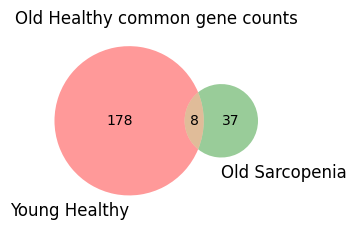

In [44]:
oh_ohyh = ohyh[(ohyh.pvalue < 0.05) & (ohyh.log2FoldChange>1)] # ohyh에서 추출
oh_osoh = osoh[(osoh.pvalue < 0.05) & (osoh.log2FoldChange<-1)] # osoh에서 추출
oh_common = oh_ohyh.index.intersection(oh_osoh.index)

print(f"Counts of oh gene in ohyh: {oh_ohyh.shape[0]}")
print(f"Counts of oh gene in osoh: {oh_osoh.shape[0]}")
print(f"Counts of oh common gene: {oh_common.shape[0]}")

plt.figure(figsize=(5, 5))
venn2([set(oh_ohyh.index), set(oh_osoh.index)], ('Young Healthy', 'Old Sarcopenia'))
plt.title('Old Healthy common gene counts')
plt.show()

## case2: common gene in **yh**

Counts of yh gene in ohyh: 72
Counts of yh gene in osyh: 109
Counts of yh common gene: 41


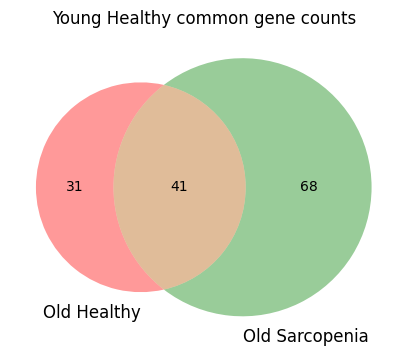

In [36]:
yh_ohyh = ohyh[(ohyh.pvalue < 0.05) & (ohyh.log2FoldChange<-1)] # ohyh에서 추출
yh_osyh = osyh[(osyh.pvalue < 0.05) & (osyh.log2FoldChange<-1)] # osyh에서 추출
yh_common = yh_ohyh.index.intersection(yh_osyh.index)

print(f"Counts of yh gene in ohyh: {yh_ohyh.shape[0]}")
print(f"Counts of yh gene in osyh: {yh_osyh.shape[0]}")
print(f"Counts of yh common gene: {yh_common.shape[0]}")

plt.figure(figsize=(5, 5))
venn2([set(yh_ohyh.index), set(yh_osyh.index)], ('Old Healthy', 'Old Sarcopenia'))
plt.title('Young Healthy common gene counts')
plt.show()

## case3: common gene in **os**

Counts of os gene in osoh: 45
Counts of os gene in osyh: 257
Counts of os common gene: 25


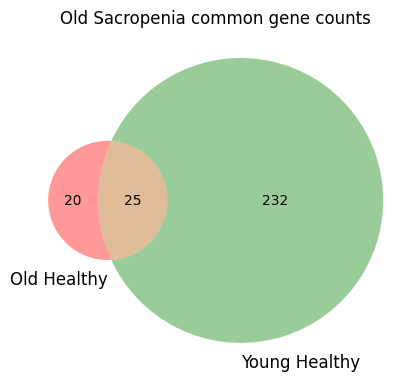

In [37]:
os_osoh = osoh[(osoh.pvalue < 0.05) & (osoh.log2FoldChange>1)] # osoh에서 추출
os_osyh = osyh[(osyh.pvalue < 0.05) & (osyh.log2FoldChange>1)] # osyh에서 추출
os_common = os_osoh.index.intersection(os_osyh.index)

print(f"Counts of os gene in osoh: {os_osoh.shape[0]}")
print(f"Counts of os gene in osyh: {os_osyh.shape[0]}")
print(f"Counts of os common gene: {os_common.shape[0]}")


plt.figure(figsize=(5, 5))
venn2([set(os_osoh.index), set(os_osyh.index)], ('Old Healthy', 'Young Healthy'))
plt.title('Old Sacropenia common gene counts')
plt.show()

In [51]:
os_common

Index(['LMO3', 'COL19A1', 'PNPLA3', 'PHEX', 'AREG', 'BTNL8', 'PEX5L', 'DLEU2L',
       'MYCL', 'EDA2R', 'MYH8', 'CGREF1', 'TMEM132B', 'ANGPTL4', 'FOS',
       'NHLH2', 'SLC47A2', 'ADIPOQ', 'CIDEC', 'COL25A1', 'RNU5B.1', 'TTC4P1',
       'RPS15AP29', 'NDUFAF2P2', 'LINC00645'],
      dtype='object')

## venndiagram

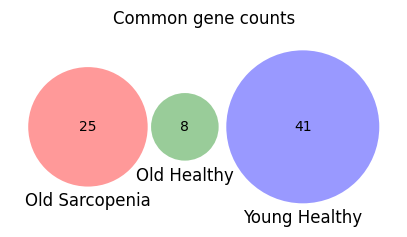

In [45]:
plt.figure(figsize=(8, 8))
venn3([set(os_common), set(oh_common), set(yh_common)], ('Old Sarcopenia', 'Old Healthy', 'Young Healthy'))
plt.title('Common gene counts')
plt.show()

# Goal 3
* gse167186, gse111016 사이 공통 유전자 개수 확인
* cutoff 기준: pvalue < 0.05, |Log2FC| > 1

## case1: common gene in **os**

Counts of os gene in osoh: 45
Counts of os gene in osoh_: 28


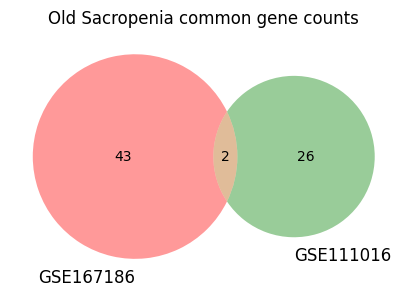

In [46]:
os_osoh = osoh[(osoh.pvalue < 0.05) & (osoh.log2FoldChange>1)] # osoh에서 추출
os_osoh_ = osoh_[(osoh_.pvalue < 0.05) & (osoh_.log2FoldChange>1)] # osoh에서 추출

print(f"Counts of os gene in osoh: {os_osoh.shape[0]}")
print(f"Counts of os gene in osoh_: {os_osoh_.shape[0]}")

plt.figure(figsize=(5, 5))
venn2([set(os_osoh.index), set(os_osoh_.index)], ('GSE167186', 'GSE111016'))
plt.title('Old Sacropenia common gene counts')
plt.show()

In [96]:
os_osoh.index.intersection(os_osoh_.index)

Index(['PLIN1', 'CIDEC'], dtype='object')

## case2: common gene in **oh**

Counts of oh gene in osoh: 45
Counts of oh gene in osoh_: 4


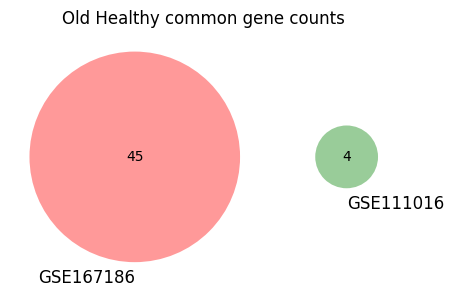

In [47]:
oh_osoh = osoh[(osoh.pvalue < 0.05) & (osoh.log2FoldChange<-1)] # osoh에서 추출
oh_osoh_ = osoh_[(osoh_.pvalue < 0.05) & (osoh_.log2FoldChange<-1)] # osoh에서 추출

print(f"Counts of oh gene in osoh: {oh_osoh.shape[0]}")
print(f"Counts of oh gene in osoh_: {oh_osoh_.shape[0]}")

plt.figure(figsize=(5, 5))
venn2([set(oh_osoh.index), set(oh_osoh_.index)], ('GSE167186', 'GSE111016'))
plt.title('Old Healthy common gene counts')
plt.show()

In [49]:
os_osoh.index.intersection(os_osoh_.index)

Index(['PLIN1', 'CIDEC'], dtype='object')